# MATSim Trip Diary Summary

Sample data - nothing real depicted here ;-)


## Mode statistics

In [242]:
import pandas as pd
import altair as alt
from dfply import *
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [243]:
modestats = pd.read_csv('data/modestats.txt', sep='\t')
modestats


,Iteration,bike,car,other,pt,ride,walk
0,0,0.0,1.00,0.0,0.0,0.0,0.00
1,1,0.0,0.90,0.0,0.0,0.0,0.10
2,2,0.0,0.75,0.0,0.0,0.0,0.25


In [244]:
points = alt.Chart(modestats).mark_circle(color='orange', opacity=1.0, size=100) \
    .encode(x='Iteration', y='car') \
    .properties(title='Auto Mode Share')

line = alt.Chart(modestats).mark_line(color='green').encode(
    x='Iteration', y='car'
)

line + points

alt.LayerChart(...)

## Activities

In [245]:
activities = pd.read_csv('data/matsim_activities.txt', sep='\t')
# activities >>= filter_by(X.start_time != 0, X.type != 'home')

activities


,activity_id,person_id,facility_id,type,start_time,end_time,x,y,sample_selector
0,357174,7196082,NaN,home,0,38160,2.612221e+06,1.268671e+06,0.043159
1,361812,7196082,3205189.0,shopping,38468,48660,2.609207e+06,1.268384e+06,0.378315
2,523105,7196082,3196799.0,shopping,48893,50700,2.610565e+06,1.268051e+06,0.150904
3,559229,7196082,NaN,home,50960,108000,2.612221e+06,1.268671e+06,0.304503
4,469609,6172219,NaN,home,0,45600,2.536150e+06,1.151962e+06,0.336986
...,...,...,...,...,...,...,...,...,...
395962,437615,1084598,639202.0,leisure,43425,47700,2.681290e+06,1.247893e+06,0.752814
395963,506445,1084598,550531.0,leisure,47829,50220,2.681145e+06,1.247293e+06,0.666863
395964,556236,1084598,NaN,home,50759,57600,2.676389e+06,1.249864e+06,0.581967
395965,694583,1084598,567975.0,leisure,58157,68700,2.679575e+06,1.251040e+06,0.675398


In [256]:
points = alt.Chart(activities).mark_point(size=1).encode(
    alt.X('x', scale=alt.Scale(zero=False)),
    alt.Y('y', scale=alt.Scale(zero=False)),
    color='type'
).properties(width=600,height=350)

points

alt.Chart(...)

## Trip Length

In [248]:
trips = pd.read_csv('data/matsim_trips.txt', sep='\t')
trips >>= filter_by(X.distance != 0)

trips

,journey_id,person_id,start_time,end_time,distance,main_mode,from_act,to_act,in_vehicle_distance,in_vehicle_time,...,access_walk_time,access_wait_time,first_boarding_stop,egress_walk_distance,egress_walk_time,last_alighting_stop,transfer_walk_distance,transfer_walk_time,transfer_wait_time,sample_selector
0,357175,7196082,38160,38468,4065.297,car,357174,361812,4065.297,308,...,0,0,NaN,0.0,0,NaN,0.0,0,0,0.413523
1,520110,7196082,48660,48893,2100.363,car,361812,523105,2100.363,233,...,0,0,NaN,0.0,0,NaN,0.0,0,0,0.258238
2,554871,7196082,50700,50960,2674.285,car,523105,559229,2674.285,260,...,0,0,NaN,0.0,0,NaN,0.0,0,0,0.855982
3,469610,6172219,45600,45811,1874.532,car,469609,472691,1874.532,211,...,0,0,NaN,0.0,0,NaN,0.0,0,0,0.765898
4,484525,6172219,46560,46704,1863.741,car,472691,486455,1863.741,144,...,0,0,NaN,0.0,0,NaN,0.0,0,0,0.884781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317362,435256,1084598,43200,43425,2671.702,car,399759,437615,2671.702,225,...,0,0,NaN,0.0,0,NaN,0.0,0,0,0.132047
317363,504727,1084598,47700,47829,1344.292,car,437615,506445,1344.292,129,...,0,0,NaN,0.0,0,NaN,0.0,0,0,0.549181
317364,544903,1084598,50220,50759,6721.605,car,506445,556236,6721.605,539,...,0,0,NaN,0.0,0,NaN,0.0,0,0,0.505566
317365,684543,1084598,57600,58157,6497.428,car,556236,694583,6497.428,557,...,0,0,NaN,0.0,0,NaN,0.0,0,0,0.753262


In [249]:
trips.describe()

,journey_id,person_id,start_time,end_time,distance,from_act,to_act,in_vehicle_distance,in_vehicle_time,access_walk_distance,access_walk_time,access_wait_time,first_boarding_stop,egress_walk_distance,egress_walk_time,last_alighting_stop,transfer_walk_distance,transfer_walk_time,transfer_wait_time,sample_selector
count,3.100850e+05,3.100850e+05,310085.000000,310085.000000,310085.000000,3.100850e+05,3.100850e+05,310085.000000,310085.000000,310085.0,310085.0,310085.0,0.0,310085.0,310085.0,0.0,310085.0,310085.0,310085.0,310085.000000
mean,5.340688e+05,4.260004e+06,49258.629111,50078.945596,12722.573091,4.090415e+05,5.485355e+05,12722.573091,820.316484,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.499104
std,2.930525e+05,2.501902e+06,17176.510942,17099.598649,24156.759942,2.796334e+05,2.893028e+05,24156.759942,1042.926320,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.288564
min,1.000000e+00,6.000000e+00,60.000000,130.000000,19.574000,0.000000e+00,6.400000e+01,19.574000,2.000000,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.000003
25%,2.907970e+05,2.045216e+06,34200.000000,34855.000000,3136.970000,1.710220e+05,3.028450e+05,3136.970000,303.000000,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.249673
50%,5.430680e+05,4.255258e+06,50100.000000,50855.000000,6176.788000,3.569720e+05,5.577280e+05,6176.788000,518.000000,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.498740
75%,7.856090e+05,6.463269e+06,62640.000000,63367.000000,11517.186000,6.273620e+05,8.008340e+05,11517.186000,886.000000,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.748973
max,1.030678e+06,8.520626e+06,95775.000000,99645.000000,485131.245000,1.030677e+06,1.030700e+06,485131.245000,18098.000000,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.999999


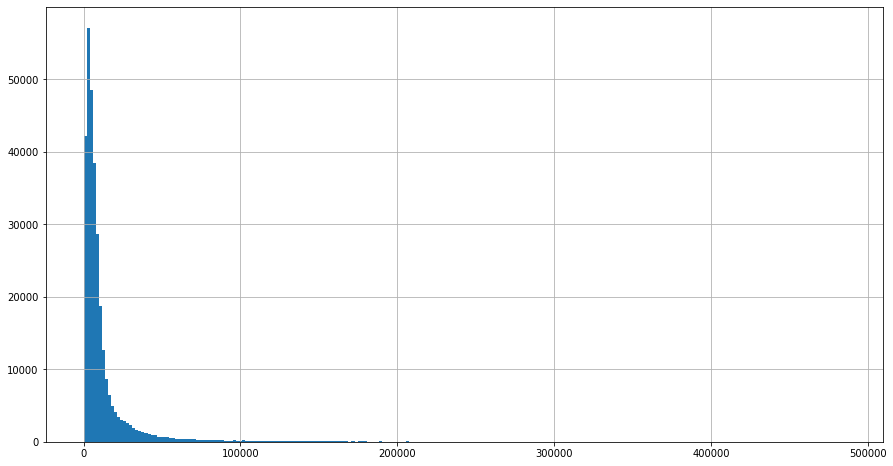

In [250]:
trips.distance.hist(bins=250, figsize=(15,8))


## Trip Departure time

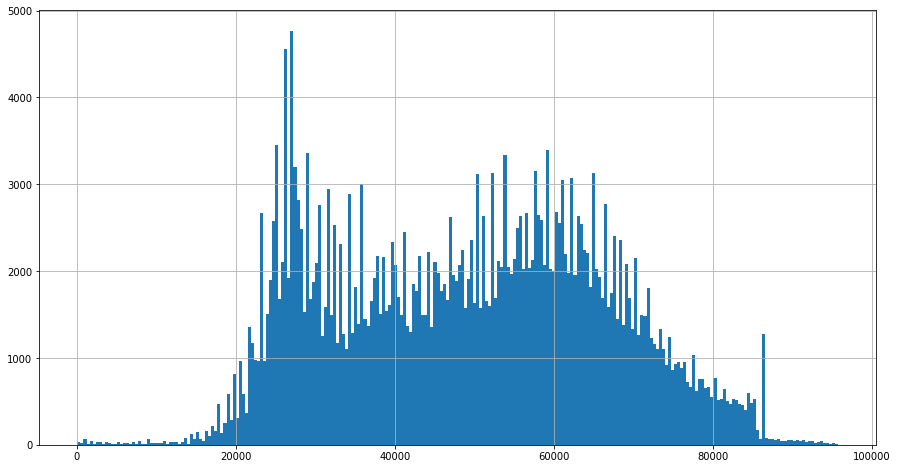

In [251]:
trips.start_time.hist(bins=250, figsize=(15,8))

# trips >>= mutate(start_hour = X.start_time / 3600)
# trips.start_hour.hist(bins=250, figsize=(15,8))

### But:  
We want the histogram **by arrival purpose**, and we don't have the purpose on the leg! We would need a join between to tables to do that.


In [252]:
to_activity = activities >> select([X.activity_id, X.type]) \
                         >> mutate( to_act = X.activity_id)

trips_w_purpose = trips >> left_join(to_activity, by='to_act')
trips_w_purpose

,journey_id,person_id,start_time,end_time,distance,main_mode,from_act,to_act,in_vehicle_distance,in_vehicle_time,...,first_boarding_stop,egress_walk_distance,egress_walk_time,last_alighting_stop,transfer_walk_distance,transfer_walk_time,transfer_wait_time,sample_selector,activity_id,type
0,357175,7196082,38160,38468,4065.297,car,357174,361812,4065.297,308,...,NaN,0.0,0,NaN,0.0,0,0,0.413523,361812,shopping
1,520110,7196082,48660,48893,2100.363,car,361812,523105,2100.363,233,...,NaN,0.0,0,NaN,0.0,0,0,0.258238,523105,shopping
2,554871,7196082,50700,50960,2674.285,car,523105,559229,2674.285,260,...,NaN,0.0,0,NaN,0.0,0,0,0.855982,559229,home
3,469610,6172219,45600,45811,1874.532,car,469609,472691,1874.532,211,...,NaN,0.0,0,NaN,0.0,0,0,0.765898,472691,leisure
4,484525,6172219,46560,46704,1863.741,car,472691,486455,1863.741,144,...,NaN,0.0,0,NaN,0.0,0,0,0.884781,486455,home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310080,435256,1084598,43200,43425,2671.702,car,399759,437615,2671.702,225,...,NaN,0.0,0,NaN,0.0,0,0,0.132047,437615,leisure
310081,504727,1084598,47700,47829,1344.292,car,437615,506445,1344.292,129,...,NaN,0.0,0,NaN,0.0,0,0,0.549181,506445,leisure
310082,544903,1084598,50220,50759,6721.605,car,506445,556236,6721.605,539,...,NaN,0.0,0,NaN,0.0,0,0,0.505566,556236,home
310083,684543,1084598,57600,58157,6497.428,car,556236,694583,6497.428,557,...,NaN,0.0,0,NaN,0.0,0,0,0.753262,694583,leisure


In [253]:
selection = alt.selection_multi(fields=['type'], bind='legend')

x = alt.Chart(trips_w_purpose).mark_bar().encode(
    alt.X('start_time', bin={'step':1800}),
    y='count()',
    color=alt.condition(selection, 'type', alt.value('lightgrey'))
).properties(title="Departure Time by Purpose") \
.add_selection(selection)

In [254]:
x

alt.Chart(...)

In [255]:
import altair as alt
from vega_datasets import data

source = data.unemployment_across_industries.url

selection = alt.selection_multi(fields=['series'], bind='legend')

alt.Chart(source).mark_area().encode(
    alt.X('yearmonth(date):T', axis=alt.Axis(domain=False, format='%Y', tickSize=0)),
    alt.Y('sum(count):Q', stack='center', axis=None),
    alt.Color('series:N', scale=alt.Scale(scheme='category20b')),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(
    selection
)

alt.Chart(...)